       County   REI  Mortality_Rate
0     Clatsop   8.3             210
1    Columbia   6.4             180
2     Gilliam   3.4             130
3  Hood River   3.8             170
4      Morrow   2.6             130
5    Portland  11.6             210
6     Sherman   1.2             120
7    Umatilla   2.5             150
8       Wasco   1.6             140
             REI  Mortality_Rate
count   9.000000        9.000000
mean    4.600000      160.000000
std     3.481738       34.278273
min     1.200000      120.000000
25%     2.500000      130.000000
50%     3.400000      150.000000
75%     6.400000      180.000000
max    11.600000      210.000000


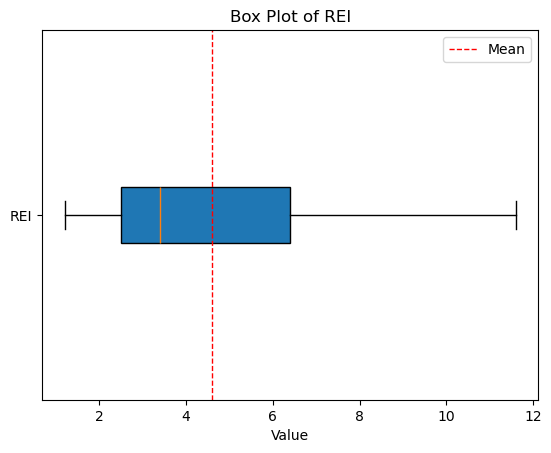

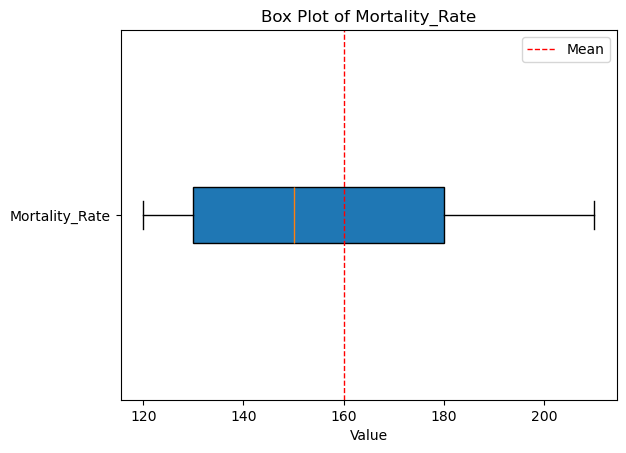

Mean Squared Error (MSE): 165.25
R^2 Score: 0.84


In [16]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore
from scipy import stats


data1 = {
    'County': ['Clatsop', 'Columbia', 'Gilliam', 'Hood River', 'Morrow', 'Portland', 'Sherman', 'Umatilla', 'Wasco'],
    'REI': [8.3, 6.4, 3.4, 3.8, 2.6, 11.6, 1.2, 2.5, 1.6],
    'Mortality_Rate': [210, 180, 130, 170, 130, 210, 120, 150, 140]
}

df1 = pd.DataFrame(data1)
print(df1)
description_states = df1.describe()
print(df1.describe())

# REI BOX PLOT
Q1_REI = df1['REI'].quantile(0.25)
Q3_REI = df1['REI'].quantile(0.75)
IQR_REI = Q3_REI - Q1_REI
lower_bound_REI = Q1_REI - (1.5*IQR_REI)
upper_bound_REI = Q3_REI +(1.5*IQR_REI)

mean_REI = df1['REI'].mean()
plt.boxplot(df1['REI'], vert=False, patch_artist=True)
plt.axvline(mean_REI, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of REI')
plt.xlabel('Value')
plt.yticks([1], ['REI'])
plt.legend()
plt.show()

# Mortality_Rate box plot
Q1_MR = df1['Mortality_Rate'].quantile(0.25)
Q3_MR = df1['Mortality_Rate'].quantile(0.75)
IQR_MR = Q3_MR - Q1_MR
lower_bound_MR = Q1_MR - (1.5*IQR_MR)
upper_bound_MR = Q3_MR +(1.5*IQR_MR)

mean_MR = df1['Mortality_Rate'].mean()
plt.boxplot(df1['Mortality_Rate'], vert=False, patch_artist=True)
plt.axvline(mean_MR, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Mortality_Rate')
plt.xlabel('Value')
plt.yticks([1], ['Mortality_Rate'])
plt.legend()
plt.show()

X = sm.add_constant(df1['REI'])
y = df1['Mortality_Rate']

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
# print(y_pred)
intercept, slope = model.params

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")



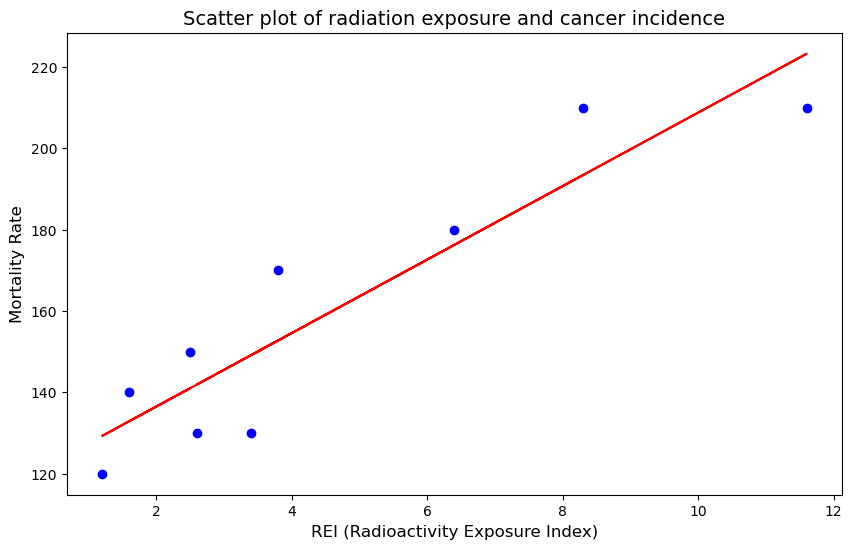

In [10]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(10, 6))
plt.scatter(df1['REI'], df1['Mortality_Rate'], color = 'blue', label = 'Observed Data')
plt.plot(df1['REI'], y_pred, color = 'red', label = 'Regression Line')
plt.xlabel('REI (Radioactivity Exposure Index)', fontsize=12)
plt.ylabel('Mortality Rate', fontsize=12)
plt.title('Scatter plot of radiation exposure and cancer incidence', fontsize=14)
plt.show()



In [11]:
X = sm.add_constant(df1['REI'].values)
y = df1['Mortality_Rate'].values

model = sm.OLS(y, X).fit()

regression_summary = model.summary()
regression_summary

# print(model.summary())

# table = model.summary2().tables
# regression_statistics_df = pd.DataFrame(table[0])
# regression_summary
# kurtosistest only valid for n>=20 

c:\Users\22683\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     37.24
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           0.000490
Time:                        12:16:04   Log-Likelihood:                -35.754
No. Observations:                   9   AIC:                             75.51
Df Residuals:                       7   BIC:                             75.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        118.4492      8.365     14.161      0.000      98.670     138.228
x1             9.0328      1.480      6.103      0.000       5.533      12.533
==============================================================================
Omnibus:                        2.479   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.290   Jarque-Bera (JB):                0.861
Skew:                          -0.055   Prob(JB):                        0.650
Kurtosis:                       1.489   Cond. No.                         9.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
from sklearn.linear_model import LinearRegression
from scipy.stats import zscore


model = LinearRegression()
model.fit(df1[['REI']], df1['Mortality_Rate'])

df1['Fitted_value'] = model.predict(df1[['REI']])
df1['Residual'] = df1['Mortality_Rate'] - df1['Fitted_value']
print(df1['Residual'])
df1['Standardized_Res'] = zscore(df1['Residual'])
residual_output = df1[['Fitted_value', 'Standardized_Res']]
residual_output



0    16.578676
1     3.740978
2   -19.160652
3    17.226232
4   -11.934419
5   -13.229532
6    -9.288513
7     8.968860
8     7.098371
Name: Residual, dtype: float64


,Fitted_value,Standardized_Res
0,193.421324,1.289660
1,176.259022,0.291012
2,149.160652,-1.490513
3,152.773768,1.340034
4,141.934419,-0.928382
5,223.229532,-1.029129
6,129.288513,-0.722556
7,141.031140,0.697690
8,132.901629,0.552184


Box Plot Values:
Q1: -0.928382206069929, Q3: 0.6976903774318501, IQR: 1.626072583501779
Lower Bound for Outliers: -3.367491081322598
Upper Bound for Outliers: 3.1367992526845185

Rounded Number of classes: 4
class Range: 0.7076367566916282


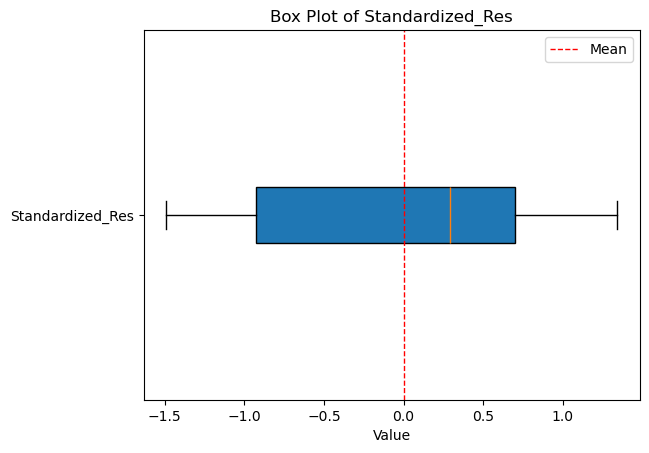

Classes:
   Standardized_Res  Frequency
0         -0.782876          3
1         -0.075240          1
2          0.632397          2
3          1.340034          3 



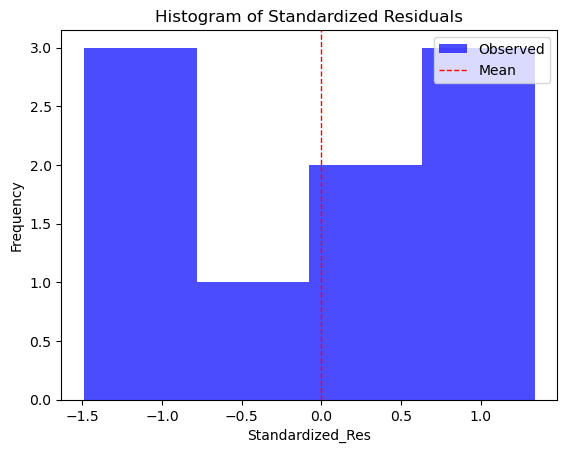

        CDF  Bin Frequency  Expected Value
0  0.230226       0.230226        2.072034
1  0.471724       0.241498        2.173483
2  0.724489       0.252765        2.274885
3  0.896777       0.172287        1.550587
4     Sum =       0.896777        8.070989
Chi-Square Table:
          χ^2
0    0.415592
1    0.633574
2    0.033216
3    1.354841
Sum  2.437223
Chi-square Statistic: 2.0897489470429065, p-value: 0.14829043742773648


In [13]:
# import numpy as np
# import scipy.stats as stats
# import matplotlib.pyplot as plt
# import pandas as pd


desc_stats = df1.describe()
desc_stats

Q1 = df1['Standardized_Res'].quantile(0.25)
Q3 = df1['Standardized_Res'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 +(1.5*IQR)

print("Box Plot Values:")
print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound for Outliers: {lower_bound}")
print(f"Upper Bound for Outliers: {upper_bound}\n")

# Calculate mean and standard deviation
mean = df1['Standardized_Res'].mean()
std_dev = df1['Standardized_Res'].std()

# Calculate Sturges' number of bins
n = len(df1)
k = int(1 + 3.322 * np.log10(n))
classrange = np.ptp(df1['Standardized_Res']) / k
print("Rounded Number of classes:", k)
print("class Range:", classrange)

# Histogram and expected frequencies
hist, bin_edges = np.histogram(df1['Standardized_Res'], bins=k)
cdf_values = stats.norm.cdf(bin_edges + classrange, mean, std_dev)

# Box plot
plt.boxplot(df1['Standardized_Res'], vert=False, patch_artist=True)
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Box Plot of Standardized_Res')
plt.xlabel('Value')
plt.yticks([1], ['Standardized_Res'])
plt.legend()
plt.show()

# Create a DataFrame for histogram data
hist_df = pd.DataFrame({'Standardized_Res': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values) - 1):
    if i == 0:
        frequency = cdf_values[0]
    else:
        frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies = np.array(bin_frequencies)

# Expected values
expected_values = bin_frequencies * n

# Expected frequencies
expected_frequencies = expected_values * (hist.sum() / expected_values.sum())


# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df.loc['Sum'] = chi_square_df.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies, ddof=2)
hist_df.Standardized_Res = hist_df.Standardized_Res + classrange

print("Classes:")
print(hist_df, "\n")
bin_centers = bin_edges[1:]

# Histogram
plt.hist(df1['Standardized_Res'], bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Standardized Residuals')
plt.xlabel('Standardized_Res')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_values.sum()]
})

# Append the sum row to the table
table_df = pd.concat([table_df, sum_row], ignore_index=True)

# Display the table
print(table_df)

print("Chi-Square Table:")
print(chi_square_df)

# Print the results
print(f"Chi-square Statistic: {chi_square_stat}, p-value: {p_value}")

In [14]:
alpha = 0.05  # Significance level
prediction_level = 0.95  # Confidence level
x_bar = 4.6  # Mean of REI
s_x = 3.481738  # Standard deviation of REI
n = len(df1)  # Sample size
t_value = stats.t.ppf(1 - alpha/2, df=n-2)  # t-value for 95% confidence/dof=n-1=21
REI_values = [5]

X = df1['REI'].values.reshape(-1, 1)
y = df1['Mortality_Rate'].values

# y_pred = model.predict(X_poly)
model = LinearRegression().fit(X, y)

residual = y - model.predict(X)
RSE = np.sqrt(np.sum(residual**2)/ (n - 2))
# residuals = y - y_pred
# RSE = np.sqrt(np.sum(residuals**2) / (n - 2))

def predict_interval(x_new, x_mean, s_x, RSE, n, t_value):
    S_xx = np.sum((df1['REI'] - x_bar)**2)  # Sum of squared deviations from the mean
    SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_bar)**2) / S_xx)
    # SE_pred = RSE * np.sqrt(1 + 1/n + ((x_new - x_mean)**2) / ((s_x**2) * (n-1)))
    prediction = model.predict([[x_new]])[0]
    lower_bound = prediction - t_value* SE_pred
    upper_bound = prediction + t_value* SE_pred
    return SE_pred, lower_bound, prediction, upper_bound

predictions = [predict_interval(x, x_bar, s_x, RSE, n, t_value) for x in REI_values]

# Prepare the table with the results
prediction_table = pd.DataFrame(predictions,
                                columns=['St_Error_of_Prediction', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound'],
                                index=REI_values)

# Add t-value and error columns
prediction_table['t_value'] = t_value
prediction_table['Error'] = RSE

# Reorder columns for the final table
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound']]

prediction_table.reset_index().rename(columns={'index': 'REI (x)'})

# Calculate prediction intervals and error based on t-value * St. Error of Prediction
prediction_table['Error'] = prediction_table['t_value'] * prediction_table['St_Error_of_Prediction']

prediction_table['Interval'] = prediction_table['Upper_Bound'] - prediction_table['Lower_Bound']

# Reorder columns for the final table after updating the Error column
prediction_table = prediction_table[['t_value', 'St_Error_of_Prediction', 'Error', 'Lower_Bound', 'Point_Prediction', 'Upper_Bound','Interval']]

prediction_table.reset_index().rename(columns={'index': 'REI (x)'})

,REI (x),t_value,St_Error_of_Prediction,Error,Lower_Bound,Point_Prediction,Upper_Bound,Interval
0,5,2.364624,15.376152,36.358822,127.254294,163.613116,199.971938,72.717643
